# COGS 118A- Project Checkpoint

# Names


- James Callahan
- Dima Musa
- Victor Tran
- Xiaonan Fu

# Abstract 

The goal of our project is to predict the price of a used car based on multiple variables including the year of manufacture, mileage (number of kilometers driven by the car), model, make (manufacturer of the car), and the location of sale. We will be using multiple training algorithms (linear regression, K-Nearest Neighbors, and SVM) to predict the price based on the multiple variables listed. Before committing to a model, we will perform simple statistical analysis to understand which variables impact price the most and how to weight them. Performance of our model will be assessed using K-folds cross-validation. A successful price estimate will fall within an established margin of error of the actual price (+/- 0.5 standard deviations).



# Background

Cars are an essential part of everyday life for most Americans. In 2022, around 276 million vehicles were registered in the United States <a name="bts"></a>[<sup>[1]</sup>](#btsnote). In 2019, 40 thousand used light vehicles were purchased in comparison to the 1,500 new light vehicles purchased <a name="usedbts"></a>[<sup>[2]</sup>](#usedbtsnote). There is a clear demand for used cars in the United States. With such high demand, predicting the selling price of a used vehicle would be extremely useful to both sellers and buyers.

There have been multiple attempts to predict car prices using machine learning algorthims. In 2014, Sameerchand Pudaruth attempted to predict the price of used cars using multiple linear regression analysis, k-nearest neighbors, naive bayes and decision trees. Pudaruth based their prediction on make, model, volume of cylinder, mileage in kilometers, year of manufacture, and price. They found comparable predicitions from all machine learning models <a name="pudaruth"></a>[<sup>[3]</sup>](#pudaruthnote).

In 2019, Enis Gegic et al. also attempted to predict the price of used cars. They used artifical neural networks, support vector machine, and random forest. They also used cross validation to evaluate their predicitons. The variables used to make predictions were make, model, fuel type, power in kilowats, year of manufacture, miles, leather (yes/no), cruise control (yes/no), and price. Then, prices were classified based on price ranges. They found applying a single machine learning algorthim to be insufficent as "accuracy was less than 50%" (Gegic et al., 118). Thus, and "ensemble of multiple machine learning algorithms has been proposed and this combination of ML methods gains accuracy of 92.38%" (Gegic et al., 118) <a name="enis"></a>[<sup>[4]</sup>](#enisnote).

# Problem Statement

Compounding global supply chain disruptions and materials shortages have sent used car prices skyrocketing in recent years. Shortages and inflated prices of new cars are driving up demand in the used market, leaving many Americans in a situation where they'll end up paying more than they should. We want to build a model that would be able to accurately predict the sale price of a used car, taking in to account variables such as number of prior owners, accidents, and mileage, among others. A car is a large investment, for many it's the second greatest expense after housing. Our hope is that this tool will help consumers better understand what factors have the strongest impact on the final sale price of a car, and to make clear what to look for to save money on a vehicle.

# Data

#### [US Used Cars Dataset](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset?select=used_cars_data.csv)

This data set originally has:
- A whopping 66 variables
- 3,000,000 unique values

The 18 variables we have kept are: 
- body_type: Type String. Body Type of the vehicle. Like Convertible, Hatchback, Sedan, etc.
- latitude: Type Float. Latitude from the geolocation of the dealership.
- longitude: Type Float. Longitude from the geolocation of the dealership.
- daysonmarket: Type Integer. Days since the vehicle was first listed on the website.
- engine_displacement: Type Float. The measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers.
- frame_damage: Type Boolean. Whether the vehicle has a damaged frame.
- fuel_type: Type String. Dominant type of fuel ingested by the vehicle.
- has_accidents: Type Boolean. Whether the vin has any accidents registered.
- horsepower: Type Float. Horsepower is the power produced by an engine.
- lisitng_color:  Type String. Dominant color group from the exterior color.
- major_options: list of strings of features.
- make_name: Type string. Manufacturer of car.
- mileage: Type float. Number of miles driven by car.
- model_name: Type string. 
- owner_count: Type float. Number of owners.
- price: Type float. Listed price of car.
- transmission: Type string. Type of transmission.
- wheel_system: Type string. Type of wheel_system.
- year: Type int. Year of manufacture.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score, confusion_matrix

For now, we will be trying to train with 'daysonmarket', 'engine_displacement', 
              'frame_damaged', 'has_accidents', 'horsepower',
              'major_options', 'mileage', 'owner_count', 'price', 'year'. In the Prelimary Results section, we will be using correlation metrics to see which variables are truly most appropriate.

In [2]:
df = pd.concat([pd.read_csv("./datasets/d1.csv"), pd.read_csv("./datasets/d2.csv"), pd.read_csv("./datasets/d3.csv"), pd.read_csv("./datasets/d4.csv")])
print(df.shape)
df.head()

(1330246, 19)


,body_type,latitude,longitude,daysonmarket,engine_displacement,frame_damaged,fuel_type,has_accidents,horsepower,listing_color,major_options,make_name,mileage,model_name,owner_count,price,transmission,wheel_system,year
0,Coupe,18.3467,-66.1098,1252,1700.0,False,Gasoline,False,237.0,RED,['Leather Seats'],Alfa Romeo,301.0,4C,2.0,97579.0,A,RWD,2015
1,Sedan,18.3467,-66.1098,1233,3000.0,False,Gasoline,False,320.0,SILVER,"['Sunroof/Moonroof', 'Alloy Wheels', 'Bluetooth']",BMW,6903.0,3 Series,2.0,58995.0,A,AWD,2016
2,Sedan,40.7333,-73.2587,33,1600.0,False,Gasoline,False,201.0,BLACK,"['Sport Package', 'Sunroof/Moonroof', 'Adaptiv...",Hyundai,30707.0,Elantra,1.0,13324.0,A,FWD,2017
3,Sedan,40.7333,-73.2587,55,1500.0,False,Gasoline,False,160.0,SILVER,"['Driver Confidence Package', 'Power Package',...",Chevrolet,42394.0,Malibu,1.0,14639.0,A,FWD,2018
4,Coupe,40.8847,-73.8317,36,3500.0,False,Gasoline,False,311.0,BLACK,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Lexus,62251.0,RC 350,1.0,32000.0,A,AWD,2018


In [3]:
#Create dataframe with variables we need
df_WIP = df.loc[:,['daysonmarket', 'engine_displacement', 
              'frame_damaged', 'has_accidents', 'horsepower',
              'major_options', 'mileage', 'owner_count', 'price', 'year']]
df_WIP = df_WIP.reset_index()
df_WIP = df_WIP.drop(['index'], axis = 1)

In [4]:
#Turn major_options into # of major options
df_test = df_WIP['major_options'].apply(lambda x : x.split(','))
df_test = df_test.apply(lambda x : np.size(x))
df_WIP['major_options'] = df_test


Finalized data frame

In [5]:
#convert True/False data into 1/0
df_WIP[['frame_damaged', 'has_accidents']] = df_WIP[['frame_damaged', 'has_accidents']].astype(int)
df_WIP.head()

,daysonmarket,engine_displacement,frame_damaged,has_accidents,horsepower,major_options,mileage,owner_count,price,year
0,1252,1700.0,0,0,237.0,1,301.0,2.0,97579.0,2015
1,1233,3000.0,0,0,320.0,3,6903.0,2.0,58995.0,2016
2,33,1600.0,0,0,201.0,12,30707.0,1.0,13324.0,2017
3,55,1500.0,0,0,160.0,14,42394.0,1.0,14639.0,2018
4,36,3500.0,0,0,311.0,7,62251.0,1.0,32000.0,2018


# Proposed Solution

We propose a comparison across multiple algorithms for solving our problem. Potential methods for solving our problem include linear regression, polynomial regression, k-nearest neighbors (KNN), support vector machine (SVM) , and the use of decision trees. Implementing a variety of supervised algorithms would afford us an opportunity to approach the problem from multiple perspectives, and would allow an opportunity to compare the performance of these various methods. For a benchmark, we will compare our results with other models that have been trained on this data. One such project can be found [here](https://www.kaggle.com/code/valchovalev/car-predictor-usa).

SVM has been used in multiple similar studies for its ability to deal with datasets with more dimensions. SVM can make a binary decision and decide in which among the two categories the input belongs to. KNN compares the new data to all the existing records to decide the best match. Decision trees are best for nominal categories. 

# Evaluation Metrics

The performance of our model will be evaluated with standard and repeated k-folds cross validation. Accuracy will be compared across models to determine which is most accurate. Cross validation is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point <a name="k"></a>[<sup>[5]</sup>](#knote).

Repeated K-Folds will allow us to test multiple hyperparameter settings and weights, which will allow us to evaluate the results of our early statistical analysis and the correlations predicted therein.

# Preliminary results

So far, we have conducted a basic statistical analysis to find correlations between our selected variables and the sale price of the vehicle. Those features are daysonmarket (number of days the car has been listed for sale), engine_displacement (measured in milliliters), frame_damaged, has_accidents (these two being binary variables), horsepower, major_options (reconfigured here from a list to the total # of major options on the car), mileage, owner_count, and year.

## Correlations

In [6]:
corr_df = df_WIP
corr = corr_df.corr()
corr['price'].sort_values(ascending=False)

price                  1.000000
horsepower             0.560818
year                   0.372601
engine_displacement    0.334753
major_options          0.332696
daysonmarket          -0.033512
frame_damaged         -0.046632
has_accidents         -0.137345
owner_count           -0.231750
mileage               -0.414245
Name: price, dtype: float64

After listing out all Pearson's r coefficient, we can see how each variable correlates to our target outcome value. If the coefficient has a larger absolute value, then this variable will be better at predicting the price of cars. Apparently, **horsepower, year, engine displacement, and mileage** are more related to the price, compared with other numeric variables. We expected frame_damage and has_accidents to be more important when predicting price, but their coefficients are close to 0. Maybe the boolean attribute makes them hard to form a linear correlation, or there are not enough observations of who has frame damage or accidents to build a confident relationship. 

In [7]:
print(corr_df['has_accidents'].value_counts())
print(corr_df["frame_damaged"].value_counts())

0    1117810
1     212436
Name: has_accidents, dtype: int64
0    1317316
1      12930
Name: frame_damaged, dtype: int64


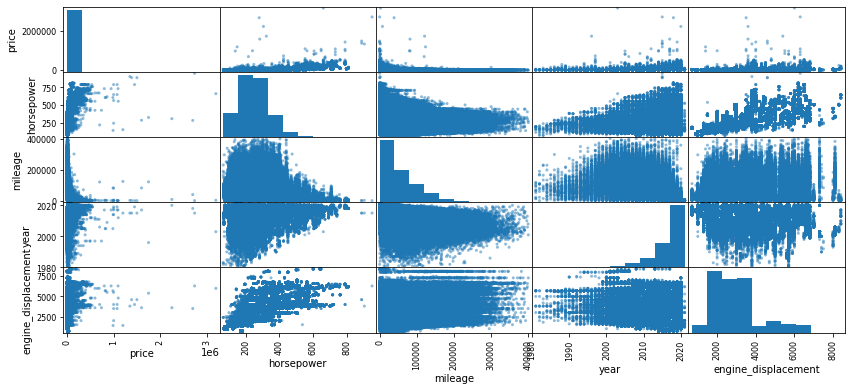

In [8]:
import matplotlib.pyplot as plt
attributes = ["price", "horsepower", "mileage", "year", "engine_displacement"]
pd.plotting.scatter_matrix(corr_df[attributes], figsize=(14, 6))
plt.show()

This scatter plot shows how those important variables correlated to car price. However, the outliers in price make the trend hard to distinguish. It is better to plot them without any extremely high price.  Besides, we noticed that for newer cars, their horsepower has a higher ceiling. Horsepower and engine displacement may have a proportional relationship. 

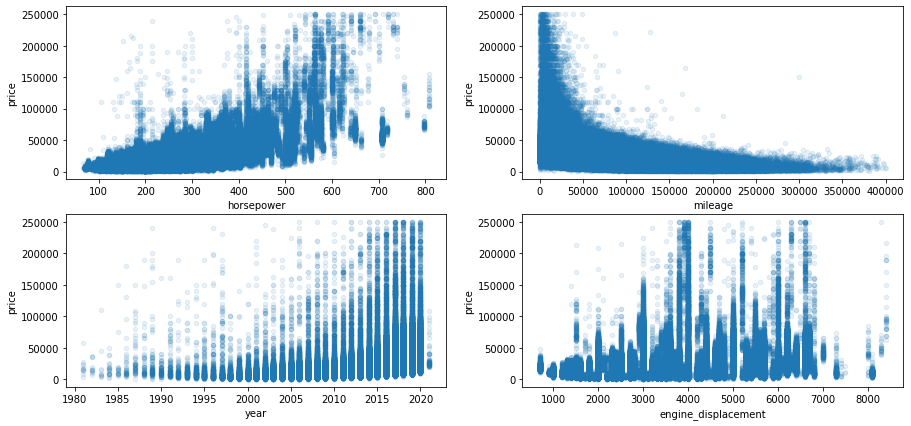

In [9]:
corr_max_price = 250000
corr_df_with_priceLimit = corr_df[attributes][corr_df['price'] < corr_max_price]

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(15, 7)
corr_df_with_priceLimit.plot(kind="scatter", x="horsepower", y="price", ax=ax[0][0], alpha=0.1)
corr_df_with_priceLimit.plot(kind="scatter", x="mileage", y="price", ax=ax[0][1], alpha=0.1)
corr_df_with_priceLimit.plot(kind="scatter", x="year", y="price", ax=ax[1][0], alpha=0.1)
corr_df_with_priceLimit.plot(kind="scatter", x="engine_displacement", y="price", ax=ax[1][1], alpha=0.1)

plt.show()

For mileage, it has a clear exponential descending shape. Its Pearson's r coefficient is not high due to the non-linear curve, but it in fact is a decent predictor. We can also see some trends in horsepower and year. The price generally gets higher with a larger horsepower and a more recent year value. The engine_displacement cannot form a clear line associated with the price. According to the plots, **mileage, horsepower, and year are predicting car prices the best.**

## Price Analysis and Categorization

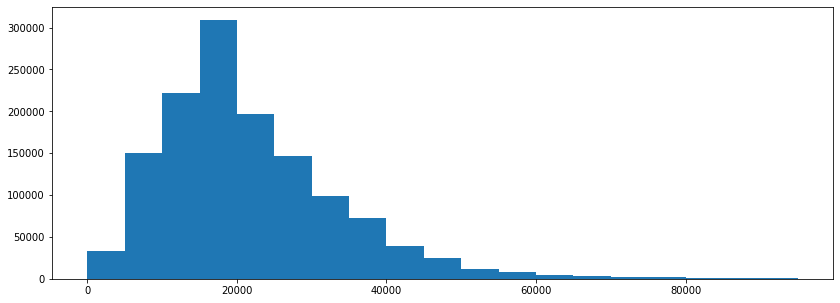

In [18]:
df_pa = df_WIP['price']
plt.figure(figsize=(14, 5))
plt.hist(df_pa, bins=range(0, 100000, 5000))
plt.show()

Using $5000 as the width of bins, this histogram shows how many cars are in each price range.  
Most observations locate in the low price range, and the mode (or plurality) of the price is between $15000 - $20000. Perhaps this dataset will have a model preform better at predicting cheaper cars, rather than cars with a price higher than 60000. 

In [19]:
pa_c, priceInterval = pd.qcut(x=df_pa, q=12, retbins=True)
del pa_c
priceInterval[0] = 0
for i in range(priceInterval.shape[0]):
    priceInterval[i] = int(round(priceInterval[i], -3))
priceInterval

array([      0.,    8000.,   11000.,   14000.,   16000.,   18000.,
         19000.,   22000.,   25000.,   28000.,   33000.,   40000.,
       3195000.])

This step is trying to convert a continuous value to multiple categories. To ensure each category has enough data to be trained and tested, the price range will not have a fixed size. We use Pandas.qcut to split the dataset into 12 price ranges, and round the boundary to thousands. Some range is too narrow or wide, hance we manually adjusted them. The next code block makes the 18k-19k wider, and adds more ranges after $40000 to make the classification more informative. 

In [20]:
priceInterval = priceInterval[0:-1].tolist()
priceInterval[6] = 20000
priceInterval.extend([55000, 70000, 100000, 150000, 200000])

In [21]:
price_count = pd.DataFrame({'lower bound':[], 'upper bound':[], 'count': []})
for i in range(len(priceInterval)):
    lower = priceInterval[i]
    if i < len(priceInterval) - 1:
        upper = priceInterval[i + 1]
        rowCount = df_pa.loc[(df_pa >= lower) & (df_pa < upper)].shape[0]
        price_count.loc[len(price_count.index)] = [lower, upper, rowCount]
    else:
        rowCount = df_pa.loc[(df_pa >= lower)].shape[0]
        price_count.loc[len(price_count.index)] = [lower, np.nan, rowCount]
        break

price_count

,lower bound,upper bound,count
0,0.0,8000.0,112322.0
1,8000.0,11000.0,106386.0
2,11000.0,14000.0,129798.0
3,14000.0,16000.0,115528.0
4,16000.0,18000.0,129450.0
5,18000.0,20000.0,120058.0
6,20000.0,22000.0,86261.0
7,22000.0,25000.0,110041.0
8,25000.0,28000.0,90715.0
9,28000.0,33000.0,117408.0


Here we count the number of rows in each price range. Since most ranges have more than 100k of data points, this price categorization is good enough for training and predicting. However, above $15k, there are only 1750 observations; it can be a problem when the model needs to predict the price for expensive cars. 

# NOTE: priceInterval is an array (list object). 
# TODO: I did not translate price interval into labels 

## Linear Regression Predictor

We have also attempted to train a linear regression predictor on the data using basic "default" hyperparameter settings, to inconclusive results. The model performed at chance, and will be improved as our statistical analysis is integrated further.

In [10]:
#OK! Data is prepped, we're ready to start training a model
y = df_WIP['price']
X = df_WIP.drop(['price'], axis = 1)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
model = LinearRegression(normalize = True).fit(X_train, y_train)
print(model.get_params())
y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
0.4935507797296723


/Users/xiaonanfu/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [12]:
max(y_pred)

109522.1261156128

In [13]:
max(df_WIP['price'])

3195000.0

# Ethics & Privacy

The data we will be using is entirely anonymous. A previously considered dataset included the VIN (Vehicle Identification Number) and location of sale, which could have potentially been used to identify current or past owners of the cars listed. We decided to use this new dataset as it contains more useful variables, and does not include potentially compromising information.

# Team Expectations 

* Equal weight will be given to suggestions from any member of the team.
* Work will be distributed evenly and fairly according to the abilities of team members.
* Weekly meetings will be held to evaluate progress.
* Concerns with someone's performance will be communicated directly to them (with grace and kindness). 
* Clear delegation of tasks and responsibilities.  
* Clear communication about progress, questions, concerns, etc.

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/22  |  1 PM |  Reflection on Project up to this point  | STATE OF THE PROJECT ADDRESS, ways to improve communication | 
| 5/24  |  4 PM |  Work on optimizing models (ALL) | Evaluate performance of models tried so far, weights given to certain variables, see what performs best, assign model to each | 
| 5/26  | 4 PM  | Second pass on written portion, update proposed methods to match currently employed methods (Dima)  | Discuss possible additions, new algorithms?   |
| 5/28  | 12 PM  | Expand analysis, futher exploration of weights (Xiaonan) | Discuss results so far, best performing models, plan analysis/final writeup   |
| 5/31  | 4 PM  | 1st draft of final writeups, to be discussed at meeting (James) | Discuss/edit project code; Complete project |
| 6/2  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (all)| Discuss/edit full project |
| 6/8  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="btsnote"></a>1.[^](#bts): [Number of U.S. Aircraft, Vehicles, Vessels, and Other Conveyances](https://www.bts.gov/content/number-us-aircraft-vehicles-vessels-and-other-conveyances)<br> 
<a name="usedbtsnote"></a>2.[^](#usedbts): [New and Used Passenger Car and Light Truck Sales and Leases](https://www.bts.gov/content/new-and-used-passenger-car-sales-and-leases-thousands-vehicles)<br>
<a name="pudaruthnote"></a>3.[^](#pudaruth): Pudaruth, Sameerchand. "Predicting the price of used cars using machine learning techniques." Int. J. Inf. Comput. Technol 4.7 (2014): 753-764. https://www.academia.edu/download/54261672/2014_Predicting_the_Price_of_Used_Cars_using_Machine_Learning_Techniques.pdf <br>
<a name="enisnote"></a>4.[^](#enis): Gegic, Enis, et al. "Car price prediction using machine learning techniques." TEM Journal 8.1 (2019): 113. https://www.temjournal.com/content/81/TEMJournalFebruary2019_113_118.pdf <br>
<a name="knote"></a>5.[^](#k): [K-Fold Cross Validation](https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833)<br>